In [100]:
import torch
import pinot
import numpy as np

In [101]:
ds = pinot.data.moonshot()
ds = pinot.data.utils.batch(ds, len(ds))
ds = pinot.data.datasets.Dataset(ds)

/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


In [113]:
g, y = next(iter(ds))
# y = y * torch.tensor(np.nan)

In [115]:
# y = np.nan_to_num(df["f_inhibition_at_20_uM"].values, 0.0)
y = y.detach().numpy()
y = (y - np.mean(y)) / np.std(y)

In [103]:
layer = pinot.representation.dgl_legacy.gn(model_name='GraphConv')
representation = pinot.representation.Sequential(
    layer=layer,
    config=[32, 'tanh',]
)
net = pinot.generative.semi_supervised_net.SemiSupervisedNet(
    representation,
)

In [104]:
net.representation_dim

32

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), 1e-3)


for _ in range(100):
    optimizer.zero_grad()
    loss = net.loss(g, y)
    print(loss)
    loss.backward()
    optimizer.step()
    

In [106]:
h = net.representation(g)
theta = [
    parameter.forward(h)
    for parameter in net.output_regressor_generative
]
mu, logvar = theta[0], theta[1]

In [118]:
from sklearn.decomposition import PCA
pca = PCA(2)
x = pca.fit_transform(mu.detach().numpy(), y)


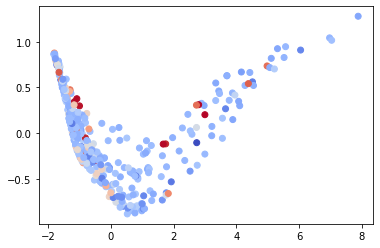

In [119]:
from matplotlib import pyplot as plt
plt.scatter(
    x[:, 0],
    x[:, 1],
    c=y,
    cmap='coolwarm'
)